In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Result_11.xlsx', sheet_name= 'Данные')

In [ ]:
df.columns

Index(['Care&Kids', 'Electronics', 'Fashion', 'FMCG', 'Home', 'Date'], dtype='object')

In [ ]:
forecast_df={}

<ipython-input-129-3c5e9eeb677b>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/z8n8foq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/1n9iltkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62665', 'data', 'file=/tmp/tmp52rl92h8/z8n8foq7.json', 'init=/tmp/tmp52rl92h8/1n9iltkh.json', 'output', 'file=/tmp/tmp52rl92h8/prophet_modelx4se935g/prophet_model-20241211210924.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:09:24 - cmdstanpy - INF

MAPE 2.7486723260890313
MAE 813431636.9975214


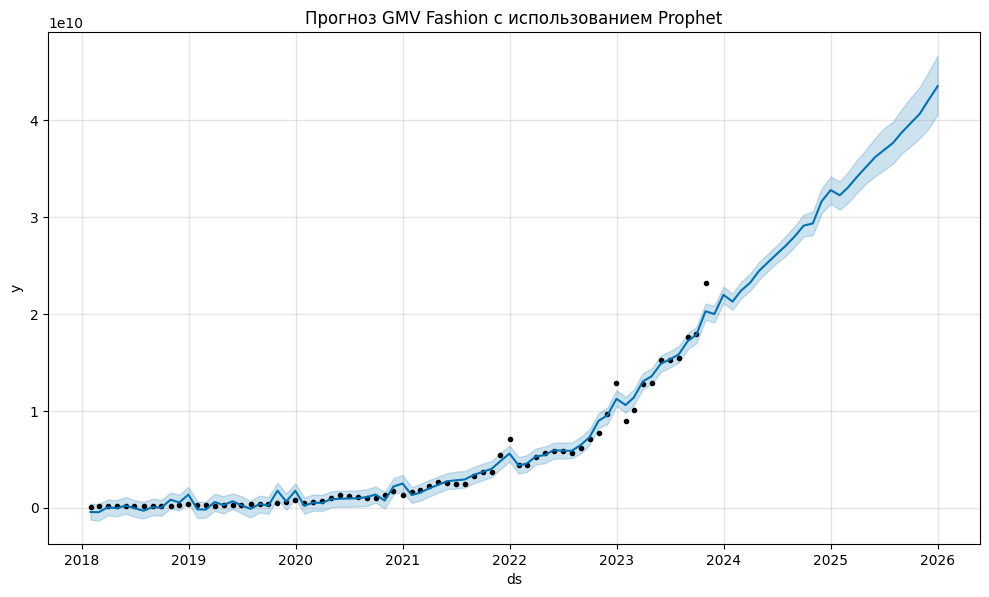

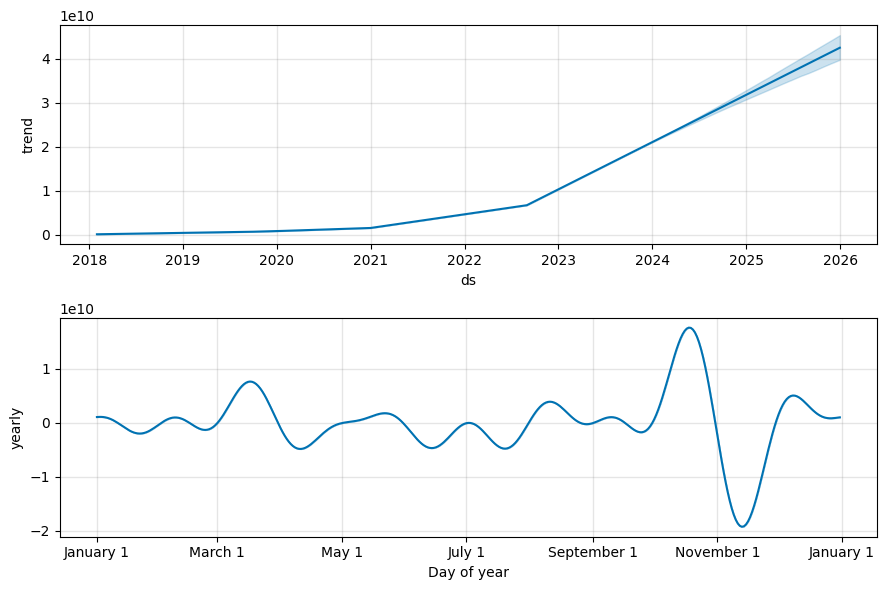

In [ ]:
from prophet import Prophet

df = pd.read_excel('Result_11.xlsx', sheet_name= 'Данные')
df = pd.DataFrame(df.Fashion)
df['y'] = df.Fashion
df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
train_df = df[:-12]
# Обучение модели Prophet
model = Prophet()
model.fit(train_df)

# Создание DataFrame для прогноза
future = model.make_future_dataframe(periods=26, freq='M')

# Прогнозирование
forecast = model.predict(future)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-18:-7]['p'])))
print('MAE', np.mean(abs(cmp_df[-18:-7]['e'])))
forecast_df['Fashion'] = cmp_df[-7:]['yhat']

# Визуализация прогноза
model.plot(forecast)
plt.title('Прогноз GMV Fashion с использованием Prophet')
plt.show()

# Подробная визуализация компонентов
model.plot_components(forecast)
plt.show()

In [ ]:
cmp_df[-14:]['yhat']

,yhat
ds,
2024-11-30,3.160966e+10
2024-12-31,3.276675e+10
2025-01-31,3.223562e+10
2025-02-28,3.304172e+10
2025-03-31,3.414064e+10
2025-04-30,3.512739e+10
2025-05-31,3.615562e+10
2025-06-30,3.687792e+10
2025-07-31,3.761891e+10


<ipython-input-101-13b1ce471a89>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/jkiib4jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/axq34b8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83405', 'data', 'file=/tmp/tmp52rl92h8/jkiib4jz.json', 'init=/tmp/tmp52rl92h8/axq34b8c.json', 'output', 'file=/tmp/tmp52rl92h8/prophet_modelrgmcmad7/prophet_model-20241211201410.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:14:10 - cmdstanpy - INF

MAPE 13.265927323599243
MAE 4782400937.835534


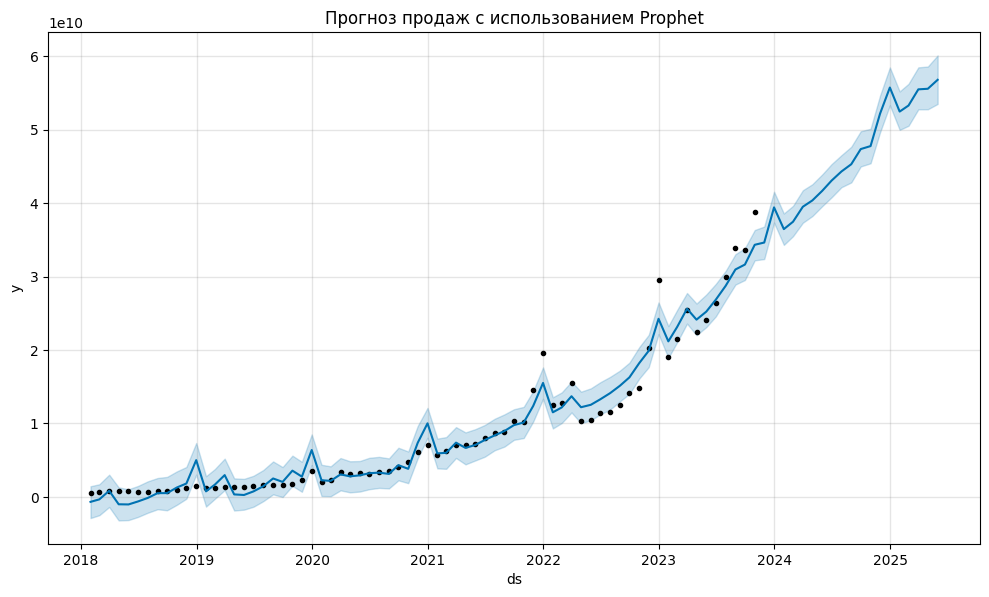

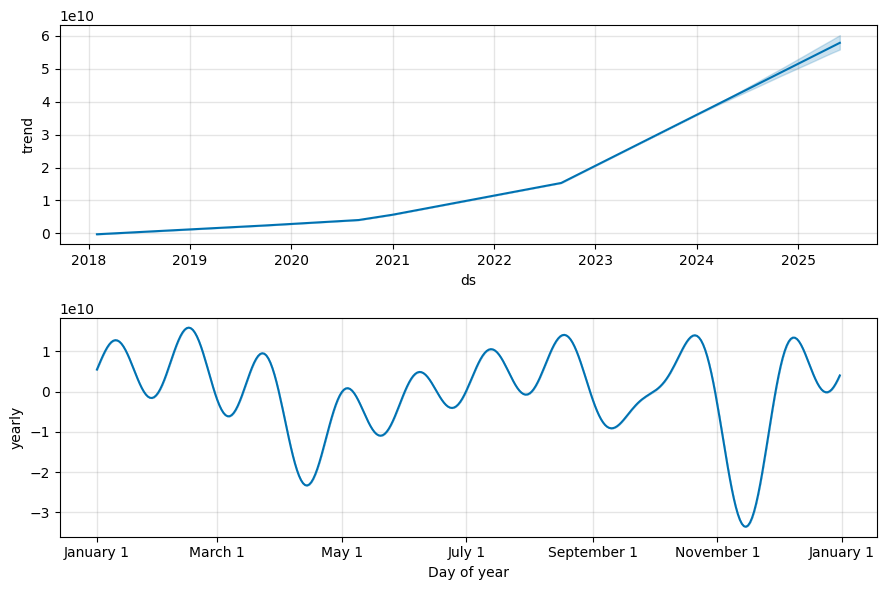

In [ ]:
from prophet import Prophet

df = pd.read_excel('Result_11.xlsx', sheet_name= 'Данные')
df = pd.DataFrame(df.Electronics)
df['y'] = df.Electronics
df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
train_df = df[:-12]
# Обучение модели Prophet
model = Prophet()
model.fit(train_df)

# Создание DataFrame для прогноза
future = model.make_future_dataframe(periods=19, freq='M')

# Прогнозирование
forecast = model.predict(future)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-18:-7]['p'])))
print('MAE', np.mean(abs(cmp_df[-18:-7]['e'])))
forecast_df['Electronics'] = cmp_df[-7:]['yhat']

# Визуализация прогноза
model.plot(forecast)
plt.title('Прогноз продаж с использованием Prophet')
plt.show()

# Подробная визуализация компонентов
model.plot_components(forecast)
plt.show()

<ipython-input-102-bc4924c7826d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/yzni_lmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/br8sf0bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70634', 'data', 'file=/tmp/tmp52rl92h8/yzni_lmm.json', 'init=/tmp/tmp52rl92h8/br8sf0bq.json', 'output', 'file=/tmp/tmp52rl92h8/prophet_model87bhjrjm/prophet_model-20241211201412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:14:12 - cmdstanpy - INF

MAPE 5.182919219659762
MAE 728658758.2079877


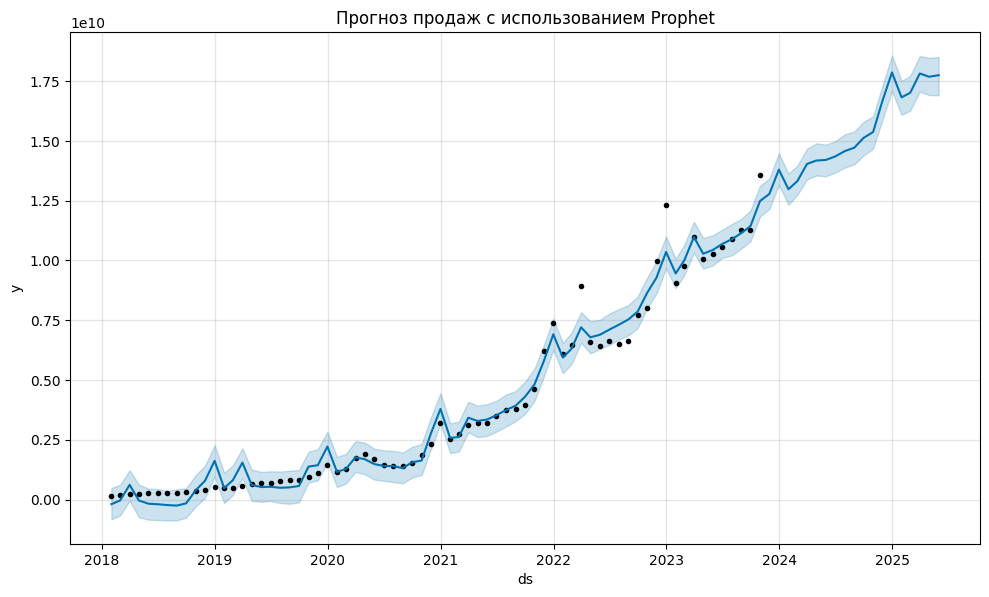

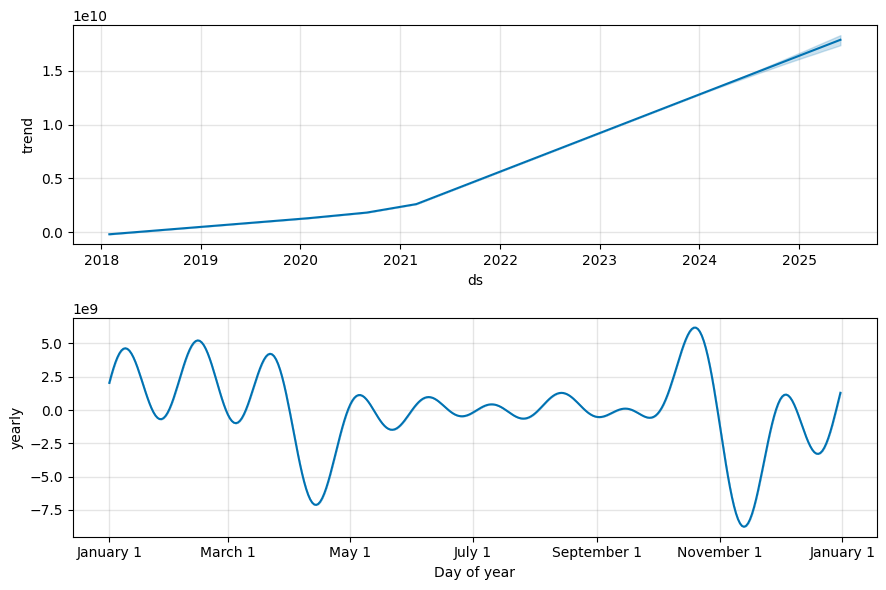

In [ ]:
from prophet import Prophet

df = pd.read_excel('Result_11.xlsx', sheet_name= 'Данные')
df = pd.DataFrame(df.FMCG)
df['y'] = df.FMCG
df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
train_df = df[:-12]
# Обучение модели Prophet
model = Prophet()
model.fit(train_df)

# Создание DataFrame для прогноза
future = model.make_future_dataframe(periods=19, freq='M')

# Прогнозирование
forecast = model.predict(future)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-18:-7]['p'])))
print('MAE', np.mean(abs(cmp_df[-18:-7]['e'])))
forecast_df['FMCG'] = cmp_df[-7:]['yhat']

# Визуализация прогноза
model.plot(forecast)
plt.title('Прогноз продаж с использованием Prophet')
plt.show()

# Подробная визуализация компонентов
model.plot_components(forecast)
plt.show()

<ipython-input-103-2217ce8782b0>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/al5e21xn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/shg3ns6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86669', 'data', 'file=/tmp/tmp52rl92h8/al5e21xn.json', 'init=/tmp/tmp52rl92h8/shg3ns6f.json', 'output', 'file=/tmp/tmp52rl92h8/prophet_modeluw_b3seg/prophet_model-20241211201413.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:14:13 - cmdstanpy - INF

MAPE 4.8573093557285985
MAE 3632008764.533647


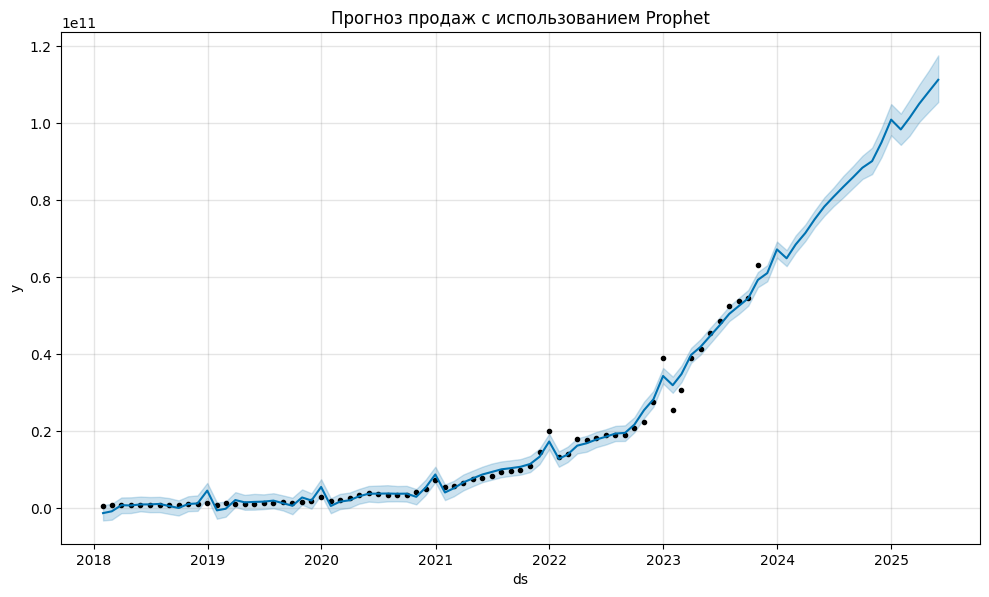

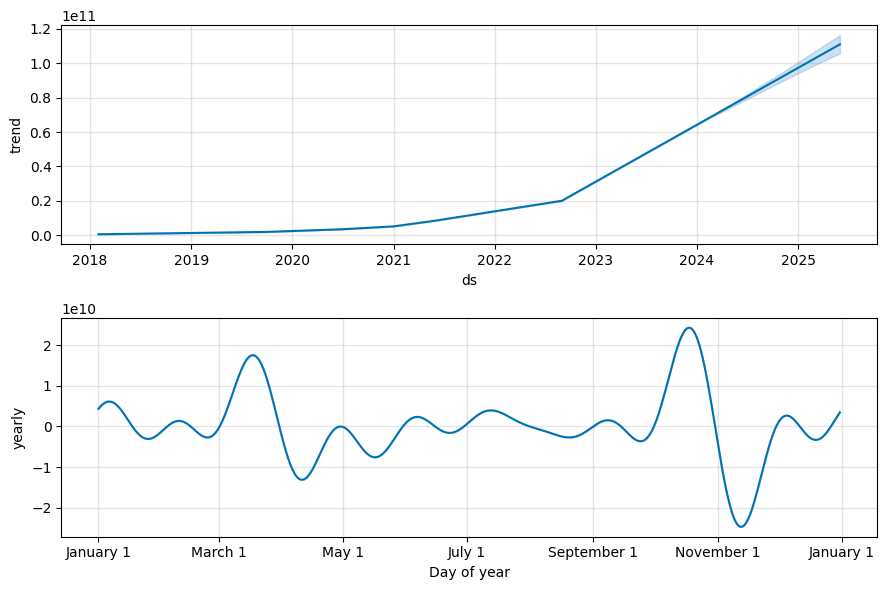

In [ ]:
from prophet import Prophet

df = pd.read_excel('Result_11.xlsx', sheet_name= 'Данные')
df = pd.DataFrame(df.Home)
df['y'] = df.Home
df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
train_df = df[:-12]
# Обучение модели Prophet
model = Prophet()
model.fit(train_df)

# Создание DataFrame для прогноза
future = model.make_future_dataframe(periods=19, freq='M')

# Прогнозирование
forecast = model.predict(future)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-18:-7]['p'])))
print('MAE', np.mean(abs(cmp_df[-18:-7]['e'])))
forecast_df['Home'] = cmp_df[-7:]['yhat']

# Визуализация прогноза
model.plot(forecast)
plt.title('Прогноз продаж с использованием Prophet')
plt.show()

# Подробная визуализация компонентов
model.plot_components(forecast)
plt.show()

<ipython-input-104-00e2bdd32b7d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/0prpl6aj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52rl92h8/g3942f_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92004', 'data', 'file=/tmp/tmp52rl92h8/0prpl6aj.json', 'init=/tmp/tmp52rl92h8/g3942f_y.json', 'output', 'file=/tmp/tmp52rl92h8/prophet_model38qy3ayp/prophet_model-20241211201415.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:14:15 - cmdstanpy - INF

MAPE 6.95383642598558
MAE 2325781348.09607


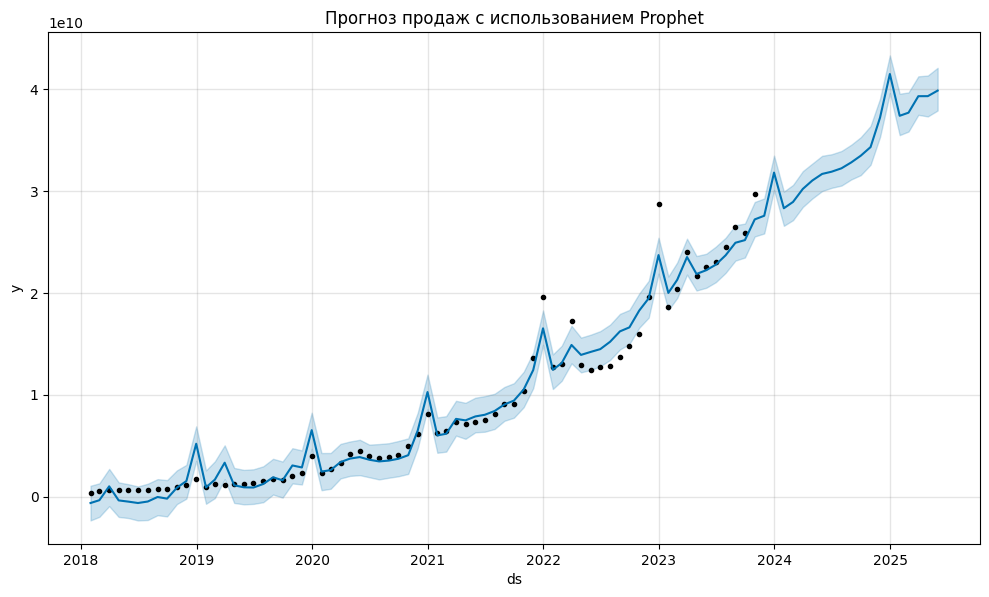

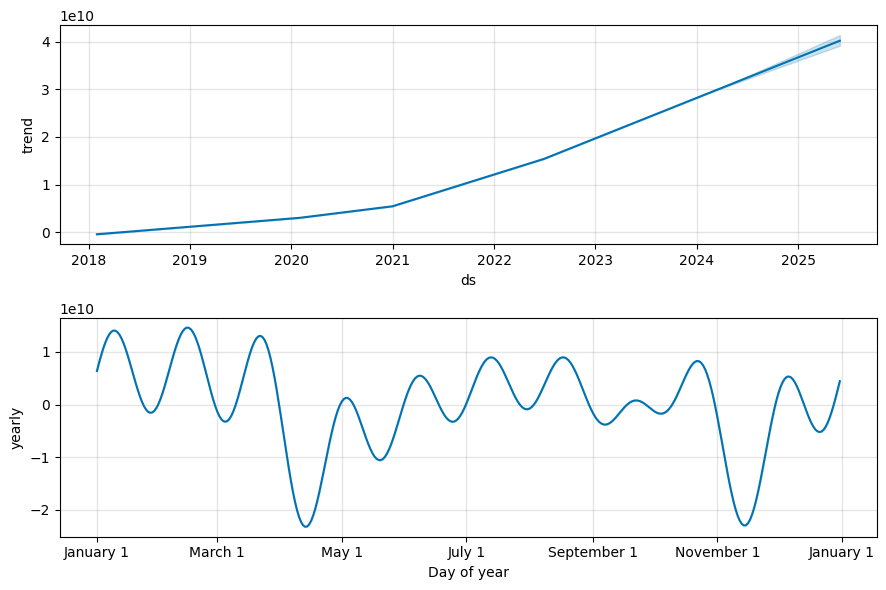

In [ ]:
from prophet import Prophet

df = pd.read_excel('Result_11.xlsx', sheet_name= 'Данные')
df = pd.DataFrame(df['Care&Kids'])
df['y'] = df['Care&Kids']
df['ds'] = pd.date_range(start='2018-01-01', periods=len(df), freq='M')
train_df = df[:-12]
# Обучение модели Prophet
model = Prophet()
model.fit(train_df)

# Создание DataFrame для прогноза
future = model.make_future_dataframe(periods=19, freq='M')

# Прогнозирование
forecast = model.predict(future)
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-18:-7]['p'])))
print('MAE', np.mean(abs(cmp_df[-18:-7]['e'])))
forecast_df['Care&Kids'] = cmp_df[-7:]['yhat']

# Визуализация прогноза
model.plot(forecast)
plt.title('Прогноз продаж с использованием Prophet')
plt.show()

# Подробная визуализация компонентов
model.plot_components(forecast)
plt.show()

In [ ]:
# forecast_df

In [ ]:
df_new = pd.DataFrame(forecast_df)
df.set_index('Date', inplace=True)

In [ ]:
df_new.rename(columns={'ds':'Date'}, inplace =True)

In [ ]:
df_new

,Fashion,Electronics,FMCG,Home,Care&Kids
ds,,,,,
2024-11-30,3.160966e+10,5.219504e+10,1.666597e+10,9.501547e+10,3.720527e+10
2024-12-31,3.276675e+10,5.575409e+10,1.786111e+10,1.009439e+11,4.148185e+10
2025-01-31,3.223562e+10,5.247810e+10,1.681896e+10,9.839660e+10,3.738028e+10
2025-02-28,3.304172e+10,5.330284e+10,1.700894e+10,1.013987e+11,3.768663e+10
2025-03-31,3.414064e+10,5.550592e+10,1.781808e+10,1.050612e+11,3.930357e+10
2025-04-30,3.512739e+10,5.558531e+10,1.767999e+10,1.081379e+11,3.930798e+10
2025-05-31,3.615562e+10,5.680475e+10,1.774485e+10,1.112859e+11,3.985078e+10


<Axes: >

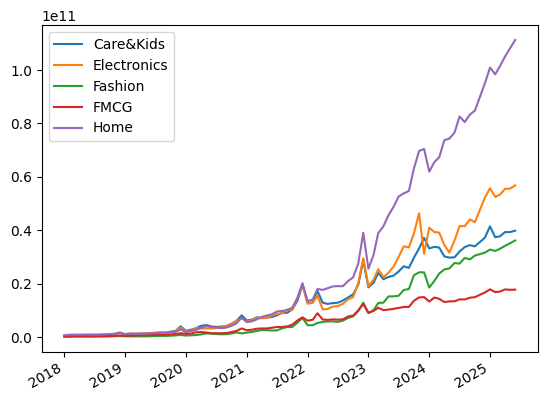

In [ ]:
pd.concat([df, df_new[['Fashion', 'Electronics', 'Home', 'FMCG', 'Care&Kids']]]).plot()

In [ ]:
df

,Care&Kids,Electronics,Fashion,FMCG,Home
Date,,,,,
2018-01-01,3.820718e+08,5.185857e+08,1.163826e+08,1.533184e+08,6.345235e+08
2018-02-01,5.838590e+08,6.960233e+08,1.370465e+08,2.003978e+08,8.362271e+08
2018-03-01,6.597988e+08,7.945406e+08,2.013583e+08,2.373097e+08,8.848237e+08
2018-04-01,6.162316e+08,7.531259e+08,1.788376e+08,2.418403e+08,8.587862e+08
2018-05-01,6.356013e+08,7.461687e+08,1.685397e+08,2.635028e+08,9.212849e+08
...,...,...,...,...,...
2024-06-01,2.985160e+10,3.613970e+10,2.772593e+10,1.337307e+10,7.660236e+10
2024-07-01,3.202480e+10,4.155062e+10,2.750245e+10,1.409756e+10,8.262436e+10
2024-08-01,3.369999e+10,4.151469e+10,2.961862e+10,1.407800e+10,8.052563e+10
